In [1]:
import numpy as np
import astropy
import regions
import matplotlib.pyplot as plt
from astropy.io import ascii
from astropy.io import fits 
from astropy import units as u 
from regions import read_ds9, write_ds9
from astropy.coordinates import SkyCoord
import glob, os
from astropy.coordinates import Angle, SkyCoord
from regions import CircleSkyRegion
from astropy.coordinates import SkyOffsetFrame
from astropy import cosmology 
import math
from astropy.table import Table, Column, unique
from matplotlib import pyplot
import random
import scipy
import collections 
from collections import Counter

In [2]:
file = 'C://Users/Janel/Desktop/master_BCG_Cluster_Data2.txt' #master cluster data
file2 = 'C://Users/Janel/Documents/Duplicates.txt' #names of duplicates that I found in previous code 
file3 = 'C://Users/Janel/Desktop/all_BCG_coords.txt'#original BCG coordinates 


outfil = 'C://Users/Janel/Desktop/Multiple_BCGs.txt'#writing info of multiple BCGs in this 

data =ascii.read(file,format = 'basic') #opening master file for reading 
data2 = ascii.read(file3) #opening BCG coordinaates for reading 
dup = open(file2, 'r') #opening duplicates file 


# setting table names for the new data 
newdata = Table(names=('Name','SZ_RA','SZ_Dec','Xpeak_RA','Xpeak_Dec', 'BCG_RA', 'BCG_Dec', 'Redshift'), dtype=('U17','f8','f8','f8','f8','f8','f8','f8'))


#indexing needed data in which we want to find dubplicates for  
cnames = data['Name']
szra = data['SZ_RA']
szdec = data['SZ_Dec']
xra = data['Xpeak_RA']
xdec = data['Xpeak_Dec']
bra = data ['BCG_RA']
bdec = data ['BCG_Dec']
z_cl = data['Redshift']

doubles = []     #defining array 
for i in range(len(data)): #for the length of the data 
    doubles = Counter(cnames).most_common() #identifying and counting the duplicate data 

for lines in dup:
    dup_names1 = lines.split()  #splitting the data into columns 
    dup_names = '/n'.join(dup_names1) #getting the names for the duplicates 
    for i in range(len(data)): #for the length og data 
        if cnames[i] == dup_names: #if cnames matches dup_name 
            newdata.add_row((cnames[i], szra[i], szdec[i], xra[i], xdec[i],bra[i],bdec[i], z_cl[i])) #write the data into the new file 
print(newdata)
#print([19:21])
#newdata.write(outfil,format='ascii',overwrite=True)   
#cluster names of doubles were copied and pasted into a new text document called, "duplicates".  
#newdata stores all the information for the duplicates from the master sheet 


      Name         SZ_RA     SZ_Dec   ...    BCG_RA     BCG_Dec   Redshift
---------------- --------- ---------- ... ----------- ----------- --------
SPT-CLJ0551-5709 87.904144 -57.155658 ...     87.8983   -57.14125   0.4243
SPT-CLJ0551-5709 87.904144 -57.155658 ...  87.8931625 -57.1451139   0.4243
SPT-CLJ0551-5709 87.904144 -57.155658 ...  87.8830958 -57.1602028   0.4243
SPT-CLJ0014-4952 3.6968936  -49.87717 ...      3.7034 -49.8849556    0.752
SPT-CLJ0014-4952 3.6968936  -49.87717 ...   3.7107292 -49.8854639    0.752
SPT-CLJ0142-5032 25.545159 -50.543772 ...  25.5543333 -50.5355306   0.6793
SPT-CLJ0142-5032 25.545159 -50.543772 ...  25.5401042 -50.5410111   0.6793
SPT-CLJ0212-4657 33.106093 -46.950198 ...  33.1202537 -46.9488278   0.6535
SPT-CLJ0212-4657 33.106093 -46.950198 ...  33.0984658  -46.953655   0.6535
SPT-CLJ0307-6225 46.833649 -62.432706 ...    46.81897 -62.4448017   0.5801
             ...       ...        ... ...         ...         ...      ...
SPT-CLJ2218-4519 334.7485

In [41]:
#Midpoint separation calculations 
file4 = 'C://Users/Janel/Documents/Midpoint_Coordinates.txt'
file5 = 'C://Users/Janel/Desktop/Multiple_BCGs.txt'
file6 = 'C://Users/Janel/Documents/Average_Separations.txt'
file7 = 'C://Users/Janel/Documents/Duplicate_Redshift.txt'
data2 = ascii.read(file4) #reading into ascii files
data3 = ascii.read(file5)
data4 = ascii.read(file6)
data5 = ascii.read(file7)



#Indexing the midpoint data:
cnames = data2['Name']
BCG_RA = data2['RA_mp']  #midpoint coordinate for BCG RAs 
BCG_Dec = data2['Dec_mp'] #midpoint coordinate for BCG Dec 
SZ_RA = data2['SZ_RA_mp'] #midpoint coordinate for SZ center  RA
SZ_Dec = data2['SZ_Dec_mp'] #midpoint coordinate for SZ center Dec
Xpeak_RA = data2['Xpeak_RA_mp'] #midpoint coordinate for Xpeak RA
Xpeak_Dec = data2['Xpeak_Dec_mp'] #midpoint coordinate for xpeak Dec
redshift = data5['Redshift']


#Indexing BCG average sep data
BCG_avg_SZ = data4['SZ_avg_sep']
BCG_avg_Xp = data4['Xp_avg_sep']

cos = astropy.cosmology.FlatLambdaCDM(H0 = 70, Om0 = 0.3, Tcmb0 = 2.725) #defining cosomology 
adj = cos.angular_diameter_distance(redshift).value

#midpoint SZ separations 
c1 = SkyCoord(BCG_RA, BCG_Dec, unit='deg', frame = 'fk5')
c2 = SkyCoord(SZ_RA, SZ_Dec, unit='deg', frame = 'fk5')


sep = c2.separation(c1) 
nsep = sep.rad
mid_aSZ = sep.arcsec

mid_SZ_kpc = []
for values in nsep:
    sin = math.sin(values)
    distance = np.multiply(sin,adj)
    ndistance = abs(np.multiply(distance,1000))

    mid_SZ_kpc = ndistance 

#midpoint Xp separations
c3 = SkyCoord(BCG_RA, BCG_Dec, unit='deg', frame = 'fk5')
c4 = SkyCoord(Xpeak_RA, Xpeak_Dec, unit='deg', frame = 'fk5')

sep1 = c3.separation(c4)
nsep1 = sep1.rad
mid_aXp = sep1.arcsec

mid_Xp_kpc = []
for values in nsep1:
    sin = math.sin(values)
    distance = np.multiply(sin,adj)
    ndistance = abs(np.multiply(distance,1000))
    
    mid_Xp_kpc = ndistance





[119.6311563  186.9658745   43.27460006  29.73800771 188.0496216
 161.2360738   79.61994293 269.6049179   85.23870585 168.3452822
  14.31900306 225.2686862   90.03245146  77.04370701]
[4.77663346 6.30311455 6.05770812 5.95985549 5.64670006 6.29630252
 4.20345613 5.39331642 5.89204234 6.53468525 5.48850061 6.37626286
 5.7160294  6.37189107]


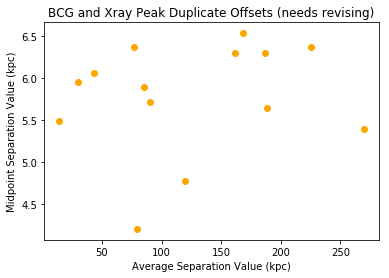

In [42]:
x = mid_Xp_kpc
a = np.array(BCG_avg_Xp)
print(a)
print(x)

plt.scatter(a,x, c= 'orange')
# x-axis label
plt.xlabel('Average Separation Value (kpc)')
# frequency labe
plt.ylabel('Midpoint Separation Value (kpc)')
# plot title
plt.title('BCG and Xray Peak Duplicate Offsets (needs revising)')
plt.savefig('C://Users/Janel/Documents/BCG_Xray_Peak_Duplicates.png')  

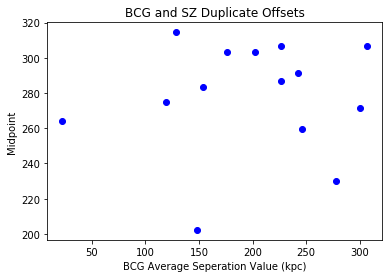

In [43]:
b = np.array(BCG_avg_SZ)
y = mid_SZ_kpc
plt.scatter(b,y, c = 'blue')

# x-axis label
plt.xlabel('BCG Average Seperation Value (kpc)')
# frequency labe
plt.ylabel('Midpoint')
# plot title
plt.title('BCG and SZ Duplicate Offsets')
plt.savefig('C://Users/Janel/Documents/BCG_SZ_Duplicates.png') 

In [71]:
#avg sep as input value for one 
#midpt sep as input value for another 
#chosen BCGs as the last one 
#midpoints might turn up 0 if bcgs are on opposite sides of cluster 
#one case seems to bracket the cluster, midpoint is very small comment on it 


     
